# Lab EM1 - TDEM Data collection

Due: 12:00 pm (noon) 1/17/2025

Objectives:
1. Learn to collect TDEM data.
2. Take detailed notes!
3. Plot collected voltage decay curves.

In [86]:
import matplotlib.pyplot as plt
import numpy as np

## Safety
> The currents used for the time-domain soundings are high (>2 Amp). Always assume a wire is on and never touch an active wire.
> 
> (Currents between 100-200 mAmp can be lethal).

## Instrumentation

Use three different TDEM instruments:

For electrical soundings we will use:
* Geonics ProTEM receiver and EM-47 Transmitter
* WalkTEM with and without rigid receiver

For UXO identification, we will use:
* Geonics EM-63

### ProTEM & EM47
![ProTEM and EM47](media/protem-em47.png)

[ProTEM User Manual (on Canvas)](https://elearning.mines.edu/files/7434917)

### WalkTEM

![ABEM WalkTEM](media/WalkTEM.png "ABEM WalkTEM")

[WalkTEM User Manual (On Canvas)](https://elearning.mines.edu/files/7434925/download?download_frd=1)

### EM63

![EM63](media/em-63.png "Geonics EM61")

(Petterman 2011)

## Grid Setup

In Kafadar Commons

### Sounding experiment:
* Set the corners of a 40m by 40m **square** loop for the Tx
    * Use wooden posts at the corners for stability.
* Flag the center

### UXO experiment:
* Determine a line spacing for the UXO grid
* Setup and place marker flags to help guide the data collection.

## Instrument setup

### Soundings:

* Layout a single wire on the 40m x 40m square. You will re-use the wire for both the WalkTEM and EM47 Transmitters.

> **IMPORTANT**
>
> Do **NOT** leave Tx wire on a spool (it can signficantly alter the turn off times).
> If there's extra wire, pull it off and make a "U" shape making it as narrow as possible.
>
> You want to make the slack take up as small an area as possible without making any loops.

#### EM47
* Place the HF-3D-1 Rx coil in the center of the Tx loop
    * Orient the x and y components to be parallel to the Tx loop sides
    * Level it.
* Keep the ProTEM at least 6m away from the Rx attenna
* Important connections:
    * Ensure all batteries are inserted (Tx battery attached, ProTEM battery inserted)
    * The EM47 to the Tx cable
    * The EM47 to the ProTEM using the reference cable. Be aware of the polarity.
    * The HF-3D-1 receiver coil to the Pre-Amp
    * The Pre-Amp to the ProTEM

#### WalkTEM
* Important connections:
    * WalkTEM to the Tx cable
        * With a damping resistor (200 ohm for 40m x 40m) connected in parallel with the Tx wire.
    * WalkTEM input A to the RC-5 Coil(Rigid 0.5m x 0.5m)
    * WalkTEM input B to the RC-200 Coil (10m x 10m wire)
    * External 12v Battery to WalkTEM
* Setup the 10m x 10m RC-200 coil centered with the Tx loop, with sides aligned with the Tx sides
* Place the RC-5 antenna at teh center of the Tx loop, with sides aligned with the Tx sides



## Data Collection

I expect you to collect data using each of the instruments.


### ProTEM
* Collect central loop sounding data in 20 gate mode at repetition rates of:
    * 285 Hz
    * 30 Hz
* Determine appropriate gain levels for each repetition rate.
* Collect 3 component reciever data.


### WalkTem
* Collect central loop sounding data using:
    * Dual Moment 10ms & 39 Gates
    * Dual Moment 25ms & 45 Gates
* Use both the Rigid Rx and a 10m x 10m wire receiver

### EM 63
* Collect data along lines over the UXO grid.

## Data Recording
After the surveys collect the data from each instrument, and make some simple plots of them.

### ProTEM
You should include plots of:
* X, Y, and Z components of the receiver voltage
* For each repetition rate (seperately).
* Plot $\log_{10}$(Voltage) vs Time Gate #
* Create 1 plot for each component, but plot every sounding collected for that component and repetition rate together.

### WalkTEM
Include plots of:
* Received voltage for each antenna
* Create 1 plot for each antenna, but plot every sounding collected for that antenna together.

* Plot $\log_{10}$(Voltage) vs Time Gate #

### EM-63
If successful, for each time gates 5, 10, 15, and 20 (seperately):
* Make a 2D Map of Recieved Voltage.


Further details about the data file formats will be provide by Monday, but I encourage the eager student to look through them yourself and try to decipher them!

# Deliverables
* The relevant pages of your field notebook
* A summary of the steps for collecting data with each instrument
* The requested plots of the voltage data.

# Reading in data

## ProTEM

* The ProTEM data output file is rather simple, there are two types of lines
    * Header lines
    * Record Lines

Header lines (identifiable by the fact they contain the word "HEADER") contain the following information:
```
line# station# HEADER DDMMYY current  turn_off_time   tx_length1  tx_length2  rx_area   tx_type   operator record#(not important) file#
```

Which are all entered into the ProTEM whenever a header is saved (saving a header also creates a new file in the ProTEM).

In [10]:
# For example, line 4 in the data file would be parsed as:
from pathlib import Path

file_name = Path('data')/'lab1_protem.txt'
with open(file_name, 'r') as f:
    lines = f.readlines()

In [14]:
hdr_line = lines[3].split()
hdr_line

['000001',
 '000000HEADER',
 '100125',
 '4.0',
 '002.5',
 '40.0',
 '40.0',
 '31.4',
 '47',
 '111',
 '00',
 '02']

In [16]:
date = hdr_line[2]
current = float(hdr_line[3]) # In Amps
to_time = float(hdr_line[4])  # In micro seconds
tx_sizes = (float(hdr_line[5]), float(hdr_line[6]))
rx_area = float(hdr_line[7])
# the rest are not too important for our purposes

In [53]:
date, current, to_time, tx_sizes, rx_area

('100125', 4.0, 2.5, (40.0, 40.0), 31.4)

The data record lines in the file containt the following information:

```
Line# Station# Frequency Gain&SyncMode Primary_Field T1 T2 T3 ... T20+  Instrument_Record#
```

Of importance to note is that this is more of a "fixed width" file format for each piece of data, you unofrtunately cannot just split on whitespaces...

So line 6 in the data file is:

In [17]:
record_line = lines[5]
record_line

'000001 000000Z H 6R +159E3  4613.0 2767.0 1666.0 1082.0 742.70 521.90 293.50 164.10 102.50 59.230 35.580 22.210 14.170 9.1860 6.0480 4.0310 2.7140 1.9300 1.1520 .93400+            50000699\n'

Which we could parse as:

In [43]:
line_number  = record_line[0:6]
station_number = record_line[7:13]
component = record_line[13]
frequency_key = record_line[15]
gain = int(record_line[17])
syncmode = record_line[18]
primary_field = record_line[20:27]

# Each gates take up 7 characters, and there are 20 gates
# The first column of the line that has this data looks to be
# 27
# First read all of the voltage data
voltages = record_line[27:27+20*7]
# Then split them up (and convert them to floats)
# using a fixed width...
voltages = [float(voltages[7*i:7*(i+1)]) for i in range(20)]

# The last number is not important

In [48]:
line_number, station_number, component, frequency_key, gain, syncmode, primary_field

('000001', '000000', 'Z', 'H', 6, 'R', '+159E3 ')

In [50]:
print(voltages)

[4613.0, 2767.0, 1666.0, 1082.0, 742.7, 521.9, 293.5, 164.1, 102.5, 59.23, 35.58, 22.21, 14.17, 9.186, 6.048, 4.031, 2.714, 1.93, 1.152, 0.934]


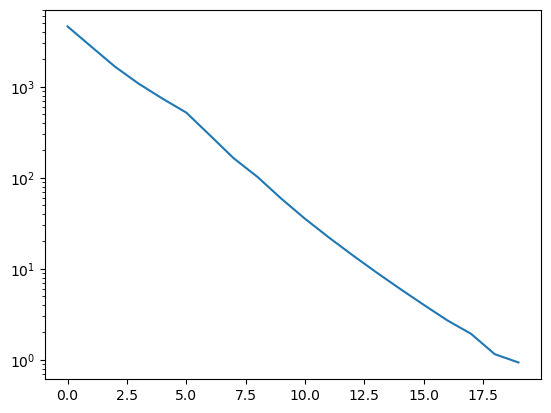

In [52]:
plt.semilogy(voltages)

### Notes from data collection
* What gain did we settle on for the H (30Hz) frequency?
* What amount of current did we use?
* How many records per component did we take?

Let's look at the data file to see which lines correspond to which records we want to actually use

## WalkTEM

The WalkTEM data ended up collecting ### Time channels of both high and low moment data.

Line 2 in this file lists the centers of the time gates (in microseconds):

In [56]:
walk_data_file = Path('data')/'walktem_data.txt'
with open(walk_data_file) as f:
    data_lines = f.readlines()

In [80]:
gate_centers = [float(time) for time in data_lines[1].split()]
n_gates = len(gate_centers)
print(n_gates, gate_centers)

46 [1.0, 3.19, 5.19, 7.19, 9.19, 11.19, 13.19, 15.19, 17.19, 19.19, 21.69, 25.19, 29.69, 35.19, 41.69, 49.69, 59.69, 72.19, 87.69, 107.19, 131.69, 161.69, 198.69, 244.69, 301.69, 372.69, 461.19, 570.69, 706.19, 874.69, 1084.19, 1343.69, 1665.69, 2065.69, 2562.19, 3178.19, 3942.69, 4891.69, 6069.19, 7530.19, 9343.69, 11594.69, 14388.19, 17855.19, 22157.69, 29539.69]


It would appear that the data recorded by the two channels are marked by header lines in the data.
The small Rx antenna was on channel 0, and the large Rx antenna was on channel 1.

Each line of data is clearly labeled what each column represents. For example line 3

In [74]:
line_split

['15:06:46_796',
 '0',
 '7.67',
 '14.82',
 '11.67',
 '12.32',
 '0',
 '0',
 '1',
 '-9.556E-01',
 '-1.321E+00',
 '-1.335E+00',
 '-1.337E+00',
 '-1.335E+00',
 '-1.338E+00',
 '-1.335E+00',
 '-1.335E+00',
 '-1.340E+00',
 '-1.333E+00',
 '-6.536E-01',
 '-2.260E-01',
 '-5.923E-02',
 '-5.430E-02',
 '-2.007E-01',
 '-1.245E-01',
 '-1.297E-01',
 '-1.045E-01',
 '-1.003E-01',
 '-8.106E-02',
 '-7.058E-02',
 '-5.970E-02',
 '-4.872E-02',
 '-3.955E-02',
 '-3.275E-02',
 '-2.641E-02',
 '-2.127E-02',
 '-1.731E-02',
 '-1.399E-02',
 '-1.111E-02',
 '-8.745E-03',
 '-6.828E-03',
 '-5.143E-03',
 '-3.686E-03',
 '-2.511E-03',
 '-1.342E-03',
 '-1.124E-03',
 '-1.028E-03',
 '-8.987E-04',
 '-6.377E-04',
 '-1.067E-03',
 '-1.763E-03',
 '-8.863E-04',
 '1.992E-04',
 '5.951E-04']

In [91]:
line_split = data_lines[20].split()

time = line_split[0].replace("_", ".")  # Time measurement started
dt = int(line_split[1])  #Time since start
current = float(line_split[2])
temperature = float(line_split[3])
vOn = float(line_split[4])
vOff = float(line_split[5])
imax = int(line_split[6])
imin = int(line_split[7])
moment_id = int(line_split[8])  # 1 for high moment 2 for low moment
volts = [float(dat) for dat in line_split[9:]]
volts
print(time, dt, current, temperature, vOn, vOff, imax, imin, moment_id, len(volts))

15:09:11.819 145023 7.62 16.59 11.64 12.29 0 0 1 45


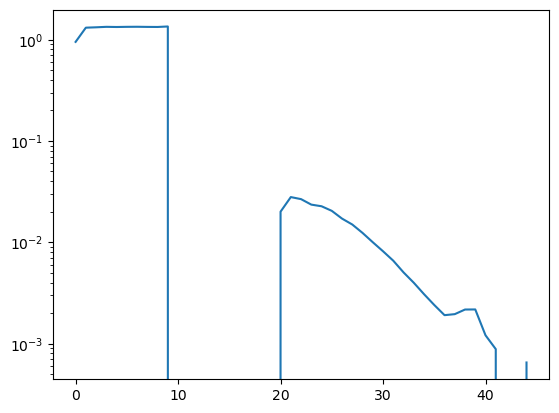

In [89]:
plt.semilogy(-np.array(volts))